<a href="https://colab.research.google.com/github/Dhruv10-8/LoanRisk/blob/main/credit_card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Make a hidden directory for Kaggle
!mkdir -p ~/.kaggle

# Move kaggle.json to that folder
!mv kaggle.json ~/.kaggle/

# Set permissions
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rikdifos/credit-card-approval-prediction


Dataset URL: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction
License(s): CC0-1.0
credit-card-approval-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q credit-card-approval-prediction.zip

replace application_record.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install optuna

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from matplotlib.pyplot.bar_label
import seaborn as sns;
import optuna
from scipy import stats
import glob
import random
import datetime

import os
import pickle
# from  datasist.structdata import detect_outliers
from tqdm import tqdm
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)
from datetime import date,timedelta

import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# Pre Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Regressors
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
# Error Metrics
from sklearn.metrics import r2_score #r2 square
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay ,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score


#classefication
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier #stacstic gradient descent clasifeier
import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import ConfusionMatrixDisplay
#clustring
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
#pca
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
app_df_read = pd.read_csv('/content/application_record.csv')
app_df_read

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
credit_df_read = pd.read_csv('/content/credit_record.csv')
credit_df_read

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [ ]:
df = app_df_read.merge(credit_df_read, how='inner', on=['ID'])
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].replace(np.nan, 'Undisclosed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
#convert data frame to slower case
def lowerCase(x):
    return x.lower()

#check duplicate data
def check_duplicate(df):
    if df.duplicated().all():
        return  'There are duplicate Data in Data Frame Nedded To be  removed . '
    else :
        return 'Data Is clean ,No Duplicate Data Found .'

# def car_name(x):
#     carname  = x.split(' ')[0]
#     return carname

# def car_model(x):
#     y   = x.split(' ')[1:]
#     carModel = ' '.join(y)
#     return  carModel

# def getfreq(x):
#     freq = x.split(' ')[-1]
#     return freq

def calc_day_of_birth (day_num):
    today = date.today()
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay

def calc_day_of_employed(day_num):
    today = date.today()
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def calculate_age(born):
    born = datetime.datetime.strptime(born, '%Y-%m-%d')
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


def get_appartment(x):
    if x == 'House / apartment' :
       x= x.split(' /')[0]
    return x

def get_ducational_type(x):
    if x == 'Secondary / secondary special' :
       x= x.split(' /')[0]
    return x

def get_label_for_data(x):
    target = ''
    if x in (2,3,4,5) :
       target = 'YES' #risky
    else:
         target = 'NO'  #not risky

    return target

def numerical_plotting(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

def categorical_plotting(df,col,title):
    fig, ax = plt.subplots(figsize=(10,5))
    ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()

def plot_feature_importance (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.coef_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()
def plot_feature_importance_2 (x,model,Model_name):
    plt.figure(figsize=(15,20))
    columns_list = x.columns
    model.feature_names = columns_list
    plt.barh(model.feature_names,sorted(model.feature_importances_))
    plt.xticks(rotation=45);
    plt.title('Feature Importance'+ Model_name)
    plt.xlabel('Feature Importance (%)')
    plt.show()

def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept
def average_plotting(df,col,output,number,title):
    data_list = df[col].value_counts().index[:number].tolist()
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
    plt.xticks(rotation=45);
    ax.bar_label(ax.containers[0])
    plt.title(title)
    plt.show()
def draw_unique_value (df,title):
    plt.figure(figsize=(10,5))
    plt.title(title)
    unique_counts = df.nunique().to_dict()
    ax = sns.barplot(list(unique_counts.keys()), list(unique_counts.values()),palette='flare')
    ax.bar_label(ax.containers[0])
    plt.plot()

In [ ]:
df['BIRTH_DAY']   = df['DAYS_BIRTH'].apply(calc_day_of_birth)
#get the day of birth for each person
df['EMPLOYED_DAY']   = df['DAYS_EMPLOYED'].apply(calc_day_of_employed)
#enhance housing
df['NAME_HOUSING_TYPE'] = df['NAME_HOUSING_TYPE'].apply(get_appartment)
#calculate age
df['age'] = df['BIRTH_DAY'].apply(calculate_age)
#enhance educational type
df['NAME_EDUCATION_TYPE'] =df['NAME_EDUCATION_TYPE'].apply(get_ducational_type)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,BIRTH_DAY,EMPLOYED_DAY,age
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Undisclosed,2.0,0,C,1992-09-15,2013-02-20,32
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Undisclosed,2.0,-1,C,1992-09-15,2013-02-20,32
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Undisclosed,2.0,-2,C,1992-09-15,2013-02-20,32
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Undisclosed,2.0,-3,C,1992-09-15,2013-02-20,32
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,Undisclosed,2.0,-4,C,1992-09-15,2013-02-20,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,2000-06-02,2022-04-23,25
777711,5150337,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,2,2000-06-02,2022-04-23,25
777712,5150337,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,2000-06-02,2022-04-23,25
777713,5150337,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,2000-06-02,2022-04-23,25


In [ ]:
def classify_loan_from_status(status_str):
    status_str = str(status_str)

    # High risk categories
    if any(char in status_str for char in ['3', '4', '5']):
        return 0  # Reject

    # Clean credit or minor late payments
    return 1  # Approve

# Apply to your DataFrame
df['loan_approved'] = df['STATUS'].apply(classify_loan_from_status)


In [ ]:
df = df.drop(['ID','DAYS_BIRTH','MONTHS_BALANCE','FLAG_WORK_PHONE','DAYS_EMPLOYED','EMPLOYED_DAY','BIRTH_DAY'],axis=1)
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,age,loan_approved
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Undisclosed,2.0,C,32,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Undisclosed,2.0,C,32,1
2,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Undisclosed,2.0,C,32,1
3,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Undisclosed,2.0,C,32,1
4,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,0,0,Undisclosed,2.0,C,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,1,0,0,Laborers,1.0,0,25,1
777711,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,1,0,0,Laborers,1.0,2,25,1
777712,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,1,0,0,Laborers,1.0,1,25,1
777713,M,N,Y,0,112500.0,Working,Secondary,Single / not married,Rented apartment,1,0,0,Laborers,1.0,0,25,1


/tmp/ipython-input-28-3866782861.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
/tmp/ipython-input-28-3866782861.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


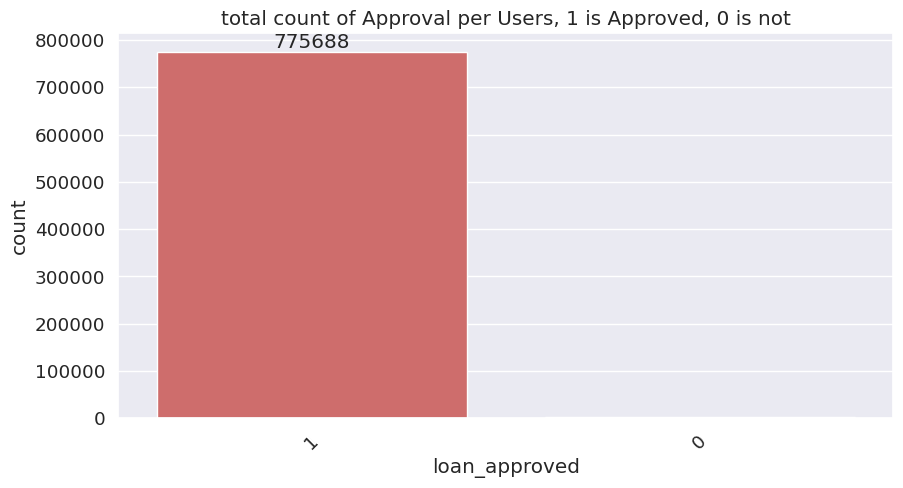

In [ ]:
df['loan_approved'].value_counts()
categorical_plotting(df,'loan_approved','total count of Approval per Users, 1 is Approved, 0 is not')

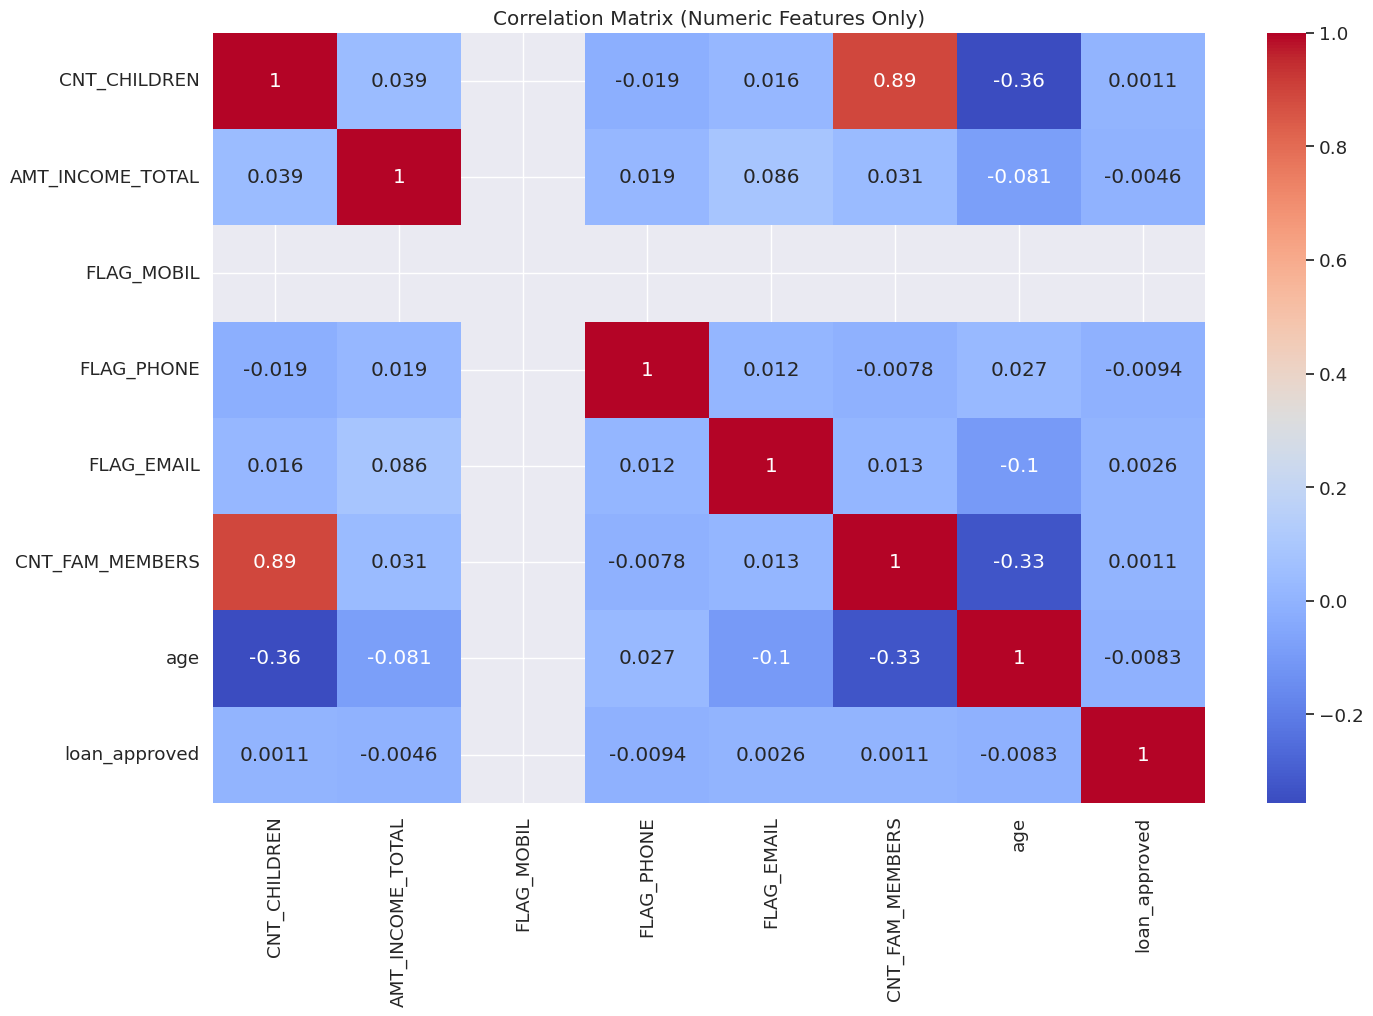

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


/tmp/ipython-input-28-3866782861.py:70: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)


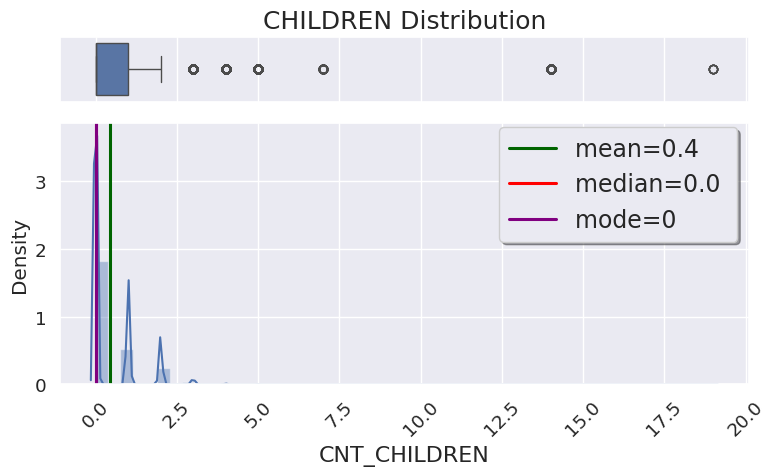

In [ ]:
numerical_plotting(df,'CNT_CHILDREN','CHILDREN Distribution',' ')

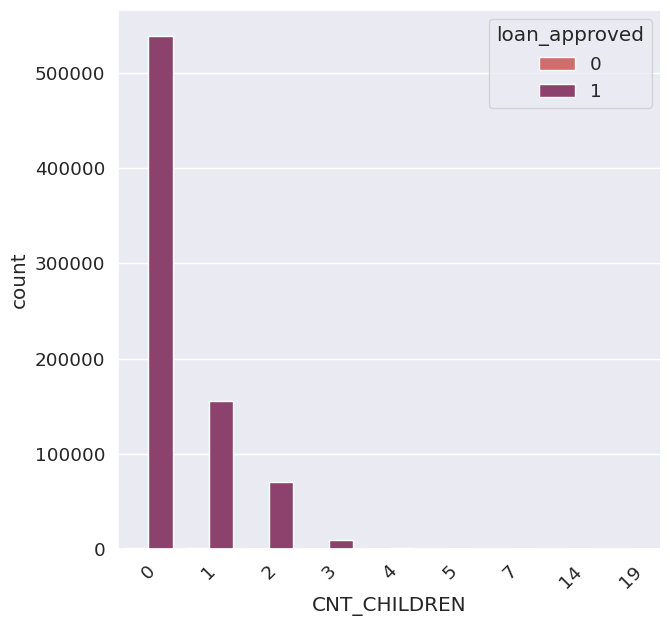

In [ ]:
sns.countplot(x='CNT_CHILDREN',data=df,palette='flare',hue='loan_approved')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-28-3866782861.py:118: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
/tmp/ipython-input-28-3866782861.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


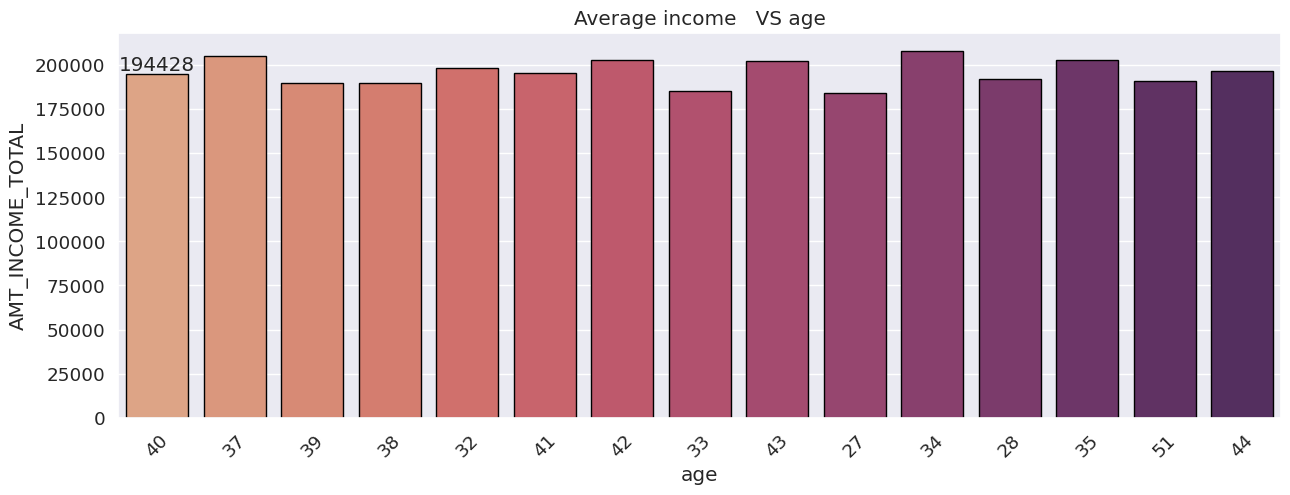

In [ ]:
average_plotting(df,'age','AMT_INCOME_TOTAL',15,'Average income   VS age')

/tmp/ipython-input-28-3866782861.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=col, data=df, palette='flare', order = df[col].value_counts().index)
/tmp/ipython-input-28-3866782861.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


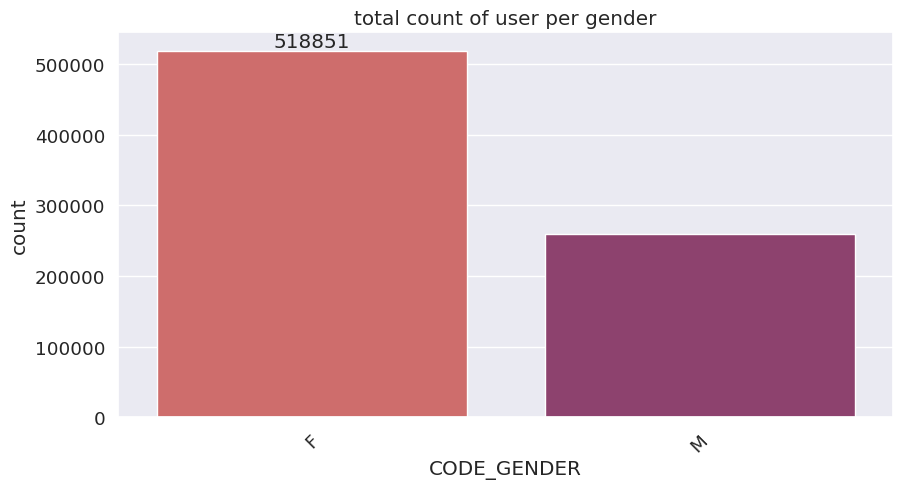

/tmp/ipython-input-28-3866782861.py:118: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")
/tmp/ipython-input-28-3866782861.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=col, y=output, data=df[df[col].isin(data_list)],order=data_list,palette='flare',ci=False,edgecolor="black")


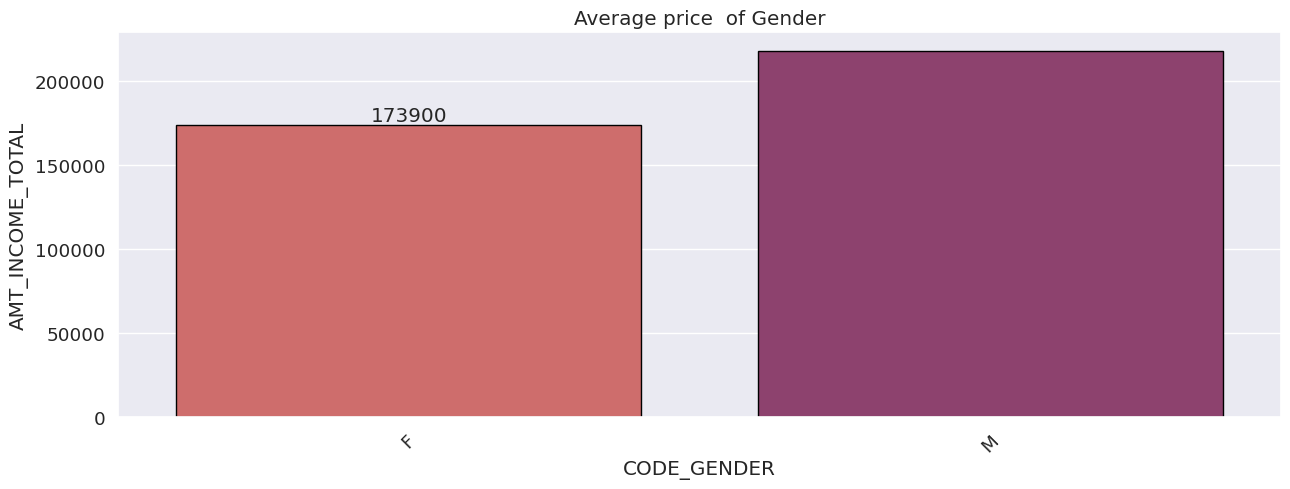

In [ ]:
categorical_plotting(df,'CODE_GENDER','total count of user per gender')

average_plotting(df,'CODE_GENDER','AMT_INCOME_TOTAL',15,'Average price  of Gender')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate features and target
X = df.drop(columns=['loan_approved'])  # or whatever your target column is
y = df['loan_approved']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Create ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Fit and transform
x_scaled = preprocessor.fit_transform(X)


In [ ]:
pca = PCA()
pct = pca.fit_transform(x_scaled)
print(np.round(pca.explained_variance_ratio_,decimals=3))
print('3 components explaining: ',sum(pca.explained_variance_ratio_[:3]))
print('4 components explaining: ',sum(pca.explained_variance_ratio_[:4]))
print('5 components explaining: ',sum(pca.explained_variance_ratio_[:5]))
print('6 components explaining: ',sum(pca.explained_variance_ratio_[:6]))
print('7 components explaining: ',sum(pca.explained_variance_ratio_[:7]))
print('8 components explaining: ',sum(pca.explained_variance_ratio_[:8]))
print('9 components explaining: ',sum(pca.explained_variance_ratio_[:9]))
print('10 components explaining: ',sum(pca.explained_variance_ratio_[:10]))
print('11 components explaining: ',sum(pca.explained_variance_ratio_[:11]))
print('12 components explaining: ',sum(pca.explained_variance_ratio_[:12]))
print('13 components explaining: ',sum(pca.explained_variance_ratio_[:13]))
print('14 components explaining: ',sum(pca.explained_variance_ratio_[:14]))
print('15 components explaining: ',sum(pca.explained_variance_ratio_[:15]))
print('16 components explaining: ',sum(pca.explained_variance_ratio_[:16]))
print('17 components explaining: ',sum(pca.explained_variance_ratio_[:17]))
print('18 components explaining: ',sum(pca.explained_variance_ratio_[:18]))
print('19 components explaining: ',sum(pca.explained_variance_ratio_[:19]))
print('20 components explaining: ',sum(pca.explained_variance_ratio_[:20]))
print('21 components explaining: ',sum(pca.explained_variance_ratio_[:21]))
print('22 components explaining: ',sum(pca.explained_variance_ratio_[:22]))
print('23 components explaining: ',sum(pca.explained_variance_ratio_[:23]))
print('24 components explaining: ',sum(pca.explained_variance_ratio_[:24]))
print('25 components explaining: ',sum(pca.explained_variance_ratio_[:25]))
print('26 components explaining: ',sum(pca.explained_variance_ratio_[:26]))
print('27 components explaining: ',sum(pca.explained_variance_ratio_[:27]))
print('28 components explaining: ',sum(pca.explained_variance_ratio_[:28]))
print('29 components explaining: ',sum(pca.explained_variance_ratio_[:29]))
print('30 components explaining: ',sum(pca.explained_variance_ratio_[:30]))

[0.212 0.114 0.095 0.09  0.083 0.052 0.04  0.038 0.037 0.03  0.028 0.026
 0.021 0.02  0.012 0.012 0.011 0.01  0.008 0.007 0.007 0.006 0.005 0.005
 0.004 0.004 0.003 0.003 0.003 0.002 0.002 0.002 0.001 0.001 0.001 0.001
 0.001 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]
3 components explaining:  0.42072016324942274
4 components explaining:  0.5108371457021033
5 components explaining:  0.5934856915937216
6 components explaining:  0.6450737101873141
7 components explaining:  0.6853499082448179
8 components explaining:  0.7231594675766553
9 components explaining:  0.7597991215171381
10 components explaining:  0.7894797247095907
11 components explaining:  0.8172644003225475
12 components explaining:  0.8436250971257399
13 components explaining:  0.86500200885082
14 components explaining:  0.8851366068606563
15 components explaining:  0.8974409997205567
16 components explaining:  0.9089775657285597
1

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:33:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00    155138

    accuracy                           1.00    155543
   macro avg       1.00      1.00      1.00    155543
weighted avg       1.00      1.00      1.00    155543



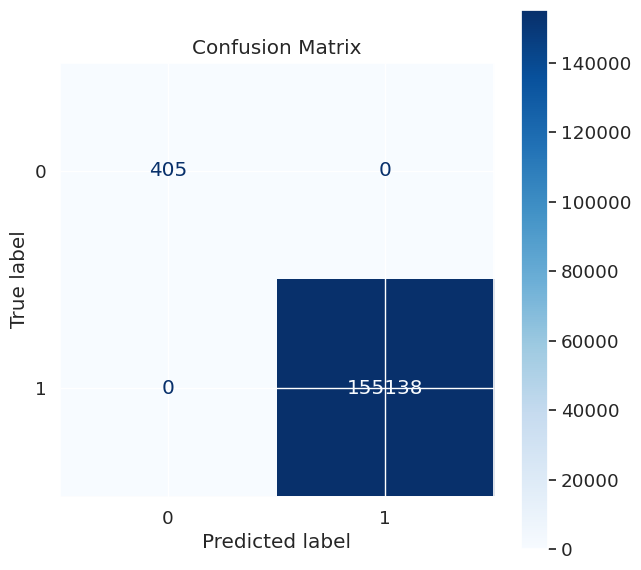

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ---------- 1. Load & Encode Data ----------
# (Assume df is already loaded)

df_clean = df.copy()

df_clean = df_clean.dropna()

# df_clean

# Encode target (Y/N → 1/0)
# df_clean['loan_approved'] = df_clean['loan_approved'].map({'Y': 1, 'N': 0})

# Label encode categorical columns
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col])

# df_clean

# ---------- 2. Split Data ----------
X = df_clean.drop('loan_approved', axis=1)
y = df_clean['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- 3. Train XGBoost Model ----------
model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
model.fit(X_train, y_train)

# ---------- 4. Evaluate ----------
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import joblib
joblib.dump(model, "xgb_model.joblib")